In [68]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import folium
import os
import sys
from sklearn.preprocessing import StandardScaler
import datetime
sys.path.append(os.path.abspath('abstract_flows'))
import arrow
import grid
import flows

In [2]:
dir = '/home/user/Desktop/Datos/'
#dir = '/Users/antoniomendez/Desktop/Tesis/Datos/datos_limpios/'

In [69]:
weekend_days = ['saturday', 'sunday']
week_days = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday']

hollydays = ['2019-01-01', '2019-02-04', '2019-03-18', '2019-05-01', '2019-09-16', '2019-11-18', '2019-12-25']
vacation = [f'2019-01-{i:02d}' for i in range(1,7)] + [f'2019-04-{i:02d}' for i in range(15,27)] + [f'2019-07-{i:02d}' for i in range(15,19)] + [f'2019-12-{i:02d}' for i in range(23,31)]

special_days = hollydays + vacation

colors = {1: 'red', 2: 'blue', 3: 'green'}
labels = {1: 'Días festivos y vacaciones', 2: 'Días de fin de semana', 3: 'Días de semana'}

# Para ecobici

In [125]:
estaciones_eco = np.load(dir + 'Adj_eco/matrices_estaciones/est_2019.npy')
#estaciones_eco = np.load('/Users/antoniomendez/Desktop/Tesis/Datos/Adj_eco/matrices_estaciones/est_2019.npy')

In [5]:
data_eco = pd.read_csv(dir + 'ecobici/ecobici_2019.csv')
data_eco.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo,Tiempo_viaje
0,M,36,11444,67,2019-01-01,0:08:44,36,2019-01-01,0:14:03,5.316667
1,M,36,9196,55,2019-01-01,0:12:05,136,2019-01-01,0:42:11,30.100000
2,M,38,2612,29,2019-01-01,0:13:15,115,2019-01-01,0:37:47,24.533333
3,M,43,7463,29,2019-01-01,0:13:36,115,2019-01-01,0:38:04,24.466667
4,M,37,3987,136,2019-01-01,0:15:30,35,2019-01-01,0:22:47,7.283333


In [6]:
data_eco_semana3 = data_eco[(data_eco['Fecha_Retiro'] >= '2019-01-14') & (data_eco['Fecha_Retiro'] <= '2019-01-20')]

In [7]:
data_eco_semana3.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo,Tiempo_viaje
241974,M,35,2385,182,2019-01-14,0:00:39,75,2019-01-14,0:05:09,4.500000
241975,M,26,8840,425,2019-01-14,0:04:30,398,2019-01-14,0:07:10,2.666667
241976,M,35,12437,15,2019-01-14,0:04:31,12,2019-01-14,0:13:26,8.916667
241977,M,40,15082,360,2019-01-14,0:04:58,190,2019-01-14,0:32:48,27.833333
241978,M,55,10289,305,2019-01-14,0:06:36,30,2019-01-14,0:24:34,17.966667


In [81]:
counter_eco_s3 = flows.count_trips_ecobici(data_eco_semana3, threshold=1, directed=True)

In [82]:
est_eco_s3 = np.concatenate((counter_eco_s3['Est_A'].unique(), counter_eco_s3['Est_B'].unique()))
est_eco_s3 = np.unique(est_eco_s3)
est_eco_s3 = np.sort(est_eco_s3)

In [84]:
len(est_eco_s3)

477

In [83]:
dates_s3 = data_eco_semana3['Fecha_Retiro'].unique()
dates_s3 = np.sort(dates_s3)
dates_s3

array(['2019-01-14', '2019-01-15', '2019-01-16', '2019-01-17',
       '2019-01-18', '2019-01-19', '2019-01-20'], dtype=object)

In [103]:
counter_eco = flows.count_trips_ecobici(data_eco, threshold=1, directed=True)
counter_eco.head()

,Est_A,Est_B,counts,prob
0,18,1,4443,0.000530
1,211,217,4056,0.000484
2,174,183,3986,0.000476
3,174,111,3896,0.000465
4,111,174,3602,0.000430


In [104]:
est_eco = np.concatenate((counter_eco['Est_A'].unique(), counter_eco['Est_B'].unique()))
est_eco = np.unique(est_eco)
est_eco = np.sort(est_eco)

In [105]:
len(est_eco)

480

In [106]:
recurrences_eco = []
for s in est_eco:
    current_data = counter_eco[(counter_eco['Est_A'] == s) | (counter_eco['Est_B'] == s)]
    recurrences_eco.append(np.sum(current_data['counts']))

In [107]:
recurrences_eco = np.array(recurrences_eco)

In [108]:
np.save('vector_files/recurrences_eco.npy', recurrences_eco)
np.save('vector_files/est_eco.npy', est_eco)

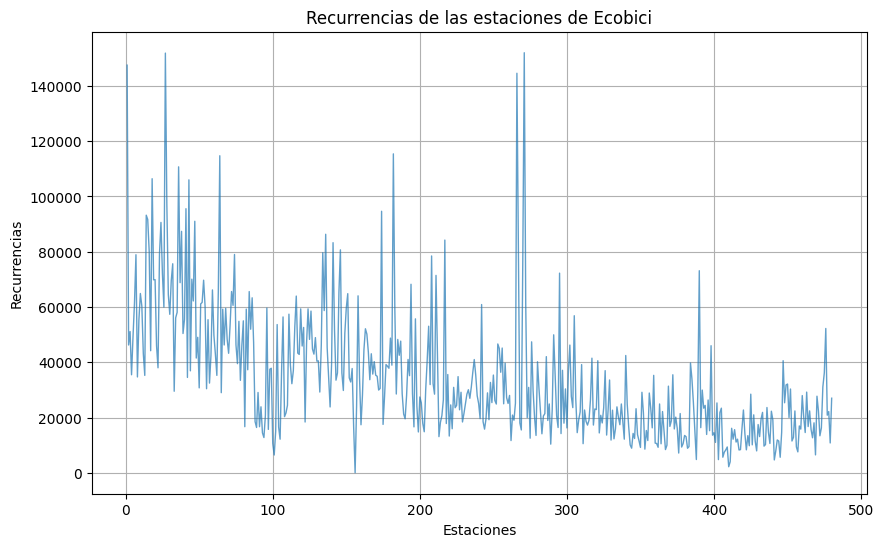

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(est_eco, recurrences_eco, linewidth=1, alpha=0.7)
plt.title('Recurrencias de las estaciones de Ecobici')
plt.xlabel('Estaciones')
plt.ylabel('Recurrencias')  
plt.grid()
plt.show()

In [11]:
est1_index = np.argmax(recurrences_eco)
est2_index = np.argsort(recurrences_eco)[-2]
est1_eco = est_eco[est1_index]
est2_eco = est_eco[est2_index]
print('Estación con más recurrencias:', est1_eco)
print('Segunda estación con más recurrencias:', est2_eco)

Estación con más recurrencias: 271
Segunda estación con más recurrencias: 27


In [9]:
est1_eco = 271
est2_eco = 27

In [13]:
dates = data_eco['Fecha_Retiro'].unique()
dates = np.sort(dates)
dates = dates[1:]
dates[:10]

array(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
       '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
       '2019-01-09', '2019-01-10'], dtype=object)

In [15]:
dates[13:20]

array(['2019-01-14', '2019-01-15', '2019-01-16', '2019-01-17',
       '2019-01-18', '2019-01-19', '2019-01-20'], dtype=object)

In [20]:
# tarda hasta 5 minutos
recurrences_est1_eco = []
recurrences_est2_eco = []
for date in dates:
    current_data = data_eco[data_eco['Fecha_Retiro'] == date]
    current_data1 = current_data[(current_data['Ciclo_Estacion_Retiro'] == est1_eco) | (current_data['Ciclo_Estacion_Arribo'] == est1_eco)]
    if current_data1.empty:
        recurrences_est1_eco.append(0)
    else:
        recurrences_est1_eco.append(np.sum(flows.count_trips_ecobici(current_data1, threshold=1, directed=True)['counts']))
    current_data2 = current_data[(current_data['Ciclo_Estacion_Retiro'] == est2_eco) | (current_data['Ciclo_Estacion_Arribo'] == est2_eco)]
    if current_data2.empty:
        recurrences_est2_eco.append(0)
    else:
        recurrences_est2_eco.append(np.sum(flows.count_trips_ecobici(current_data2, threshold=1, directed=True)['counts']))

In [26]:
recurrences_est1_eco = np.load('vector_files/recurrences_est1_eco.npy')
recurrences_est2_eco = np.load('vector_files/recurrences_est2_eco.npy')

In [16]:
recurrences_est1_eco_s3 = recurrences_est1_eco[13:20]
recurrences_est2_eco_s3 = recurrences_est2_eco[13:20]
recurrences_est1_eco_s3, recurrences_est2_eco_s3

(array([587, 517, 547, 549, 509, 218, 130]),
 array([552, 564, 594, 578, 477, 220, 384]))

In [17]:
for date in dates_s3:
    current_data = data_eco_semana3[data_eco_semana3['Fecha_Retiro'] == date]
    current_data = current_data[(current_data['Ciclo_Estacion_Retiro'] == est1_eco) | (current_data['Ciclo_Estacion_Arribo'] == est1_eco)]
    print(date, len(current_data))

2019-01-14 587
2019-01-15 517
2019-01-16 547
2019-01-17 549
2019-01-18 509
2019-01-19 218
2019-01-20 130


In [19]:
print('Recurrencia 0 en la estación 271:', np.sum(np.array(recurrences_est1_eco) == 0))
print('Recurrencia 0 en la estación 27:', np.sum(np.array(recurrences_est2_eco) == 0))

Recurrencia 0 en la estación 271: 1
Recurrencia 0 en la estación 27: 4


In [18]:
for date in dates_s3:
    current_data = data_eco_semana3[data_eco_semana3['Fecha_Retiro'] == date]
    current_data = current_data[(current_data['Ciclo_Estacion_Retiro'] == est2_eco) | (current_data['Ciclo_Estacion_Arribo'] == est2_eco)]
    print(date, len(current_data))

2019-01-14 552
2019-01-15 564
2019-01-16 594
2019-01-17 578
2019-01-18 477
2019-01-19 220
2019-01-20 384


In [127]:
grid_eco = grid.Grid(9,5,'ecobici')
map_eco = grid_eco.map_around()

for i in range(len(est_eco)):
    current_est = estaciones_eco[i, 0]
    current_index = np.where(est_eco == current_est)[0][0]
    current_recurrence = recurrences_eco[current_index]
    if estaciones_eco[i, 0] == est1_eco:
        folium.Marker([estaciones_eco[i, 1], estaciones_eco[i, 2]], popup=f'Estación {int(est1_eco)} - Recurrencia {current_recurrence}').add_to(map_eco)
    elif estaciones_eco[i, 0] == est2_eco:
        folium.Marker([estaciones_eco[i, 1], estaciones_eco[i, 2]], popup=f'Estación {int(est2_eco)} - Recurrencia {current_recurrence}').add_to(map_eco)
    elif estaciones_eco[i, 0] == 43:
        folium.Marker([estaciones_eco[i, 1], estaciones_eco[i, 2]], popup=f'Estación {int(estaciones_eco[i][0])} - Recurrencia {current_recurrence}').add_to(map_eco)

    else:
        folium.CircleMarker([estaciones_eco[i, 1], estaciones_eco[i, 2]], radius=0.5, popup=f'Estacion {int(estaciones_eco[i][0])} - Recurrencia {current_recurrence}').add_to(map_eco)
map_eco

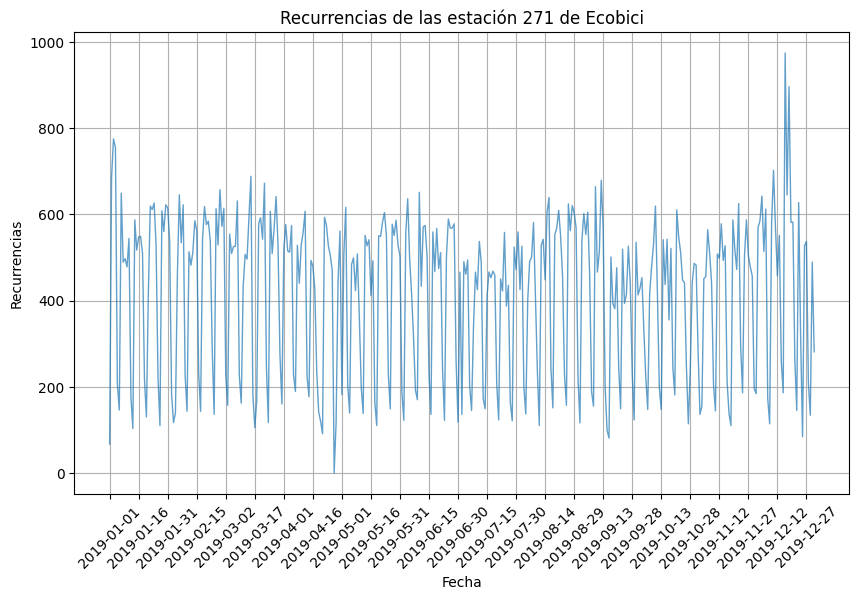

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(dates, recurrences_est1_eco, linewidth=1, alpha=0.7, label='Estación 1')
plt.title(f'Recurrencias de las estación {int(est1_eco)} de Ecobici')
plt.xlabel('Fecha')
plt.ylabel('Recurrencias')
plt.xticks(dates[::15], rotation=45)
plt.grid()
plt.show()

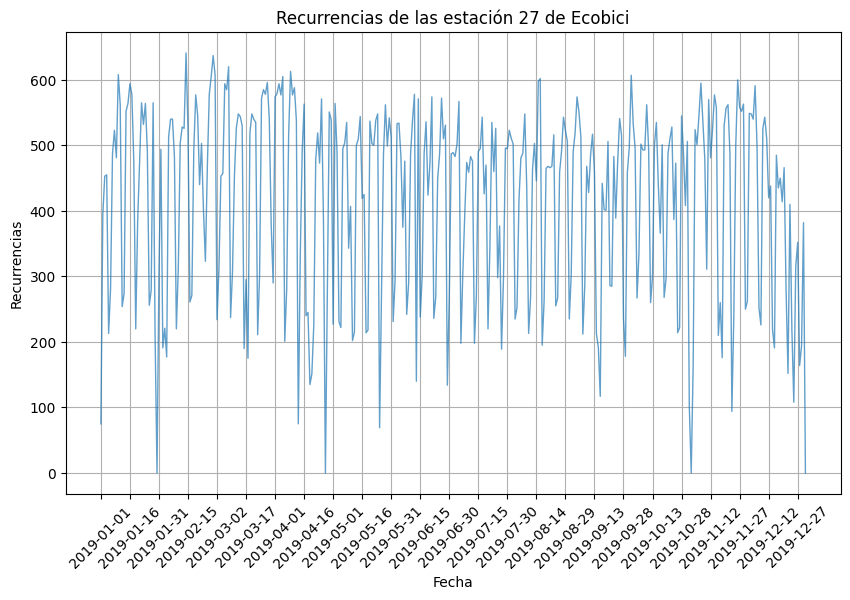

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(dates, recurrences_est2_eco, linewidth=1, alpha=0.7, label='Estación 2')
plt.title(f'Recurrencias de las estación {int(est2_eco)} de Ecobici')
plt.xlabel('Fecha')
plt.ylabel('Recurrencias')
plt.xticks(dates[::15], rotation=45)
plt.grid()
plt.show()

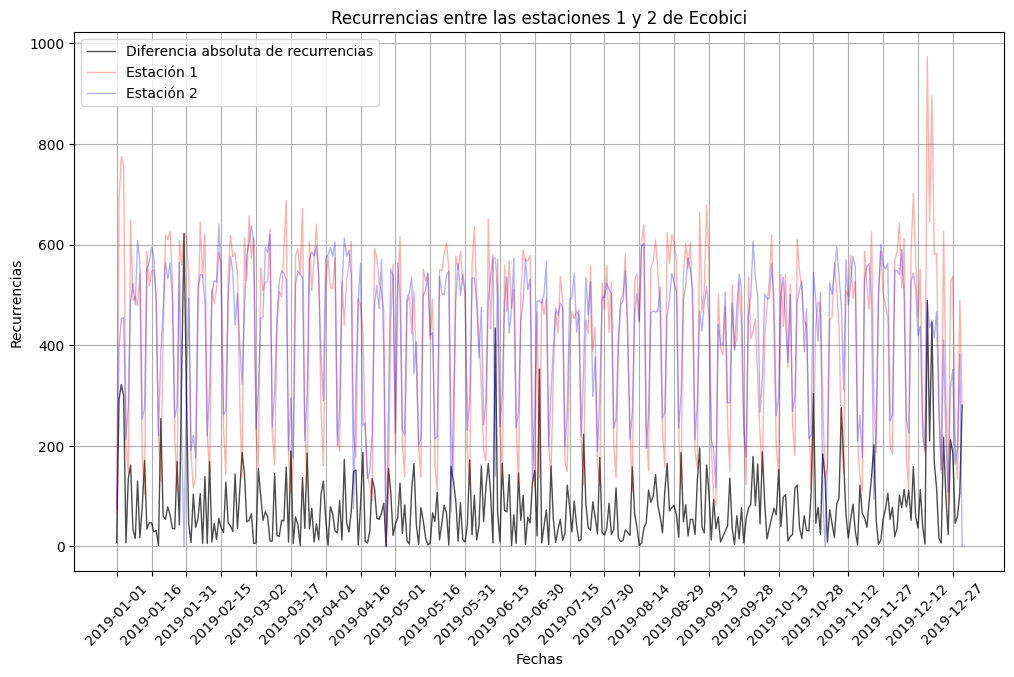

In [68]:
n = len(dates)
plt.figure(figsize=(12, 7))
plt.plot(dates[:n], np.abs(recurrences_est1_eco[:n] - recurrences_est2_eco[:n]), linewidth=1, alpha=0.7, c='black', label='Diferencia absoluta de recurrencias')
plt.plot(dates[:n], recurrences_est1_eco[:n], linewidth=1, alpha=0.3, c='red', label='Estación 1')
plt.plot(dates[:n], recurrences_est2_eco[:n], linewidth=1, alpha=0.3, c='blue', label='Estación 2')
plt.title('Recurrencias entre las estaciones 1 y 2 de Ecobici')
plt.xlabel('Fechas')
plt.ylabel('Recurrencias')
plt.xticks(dates[:n:15], rotation=45)
plt.legend()
plt.grid()
plt.show()

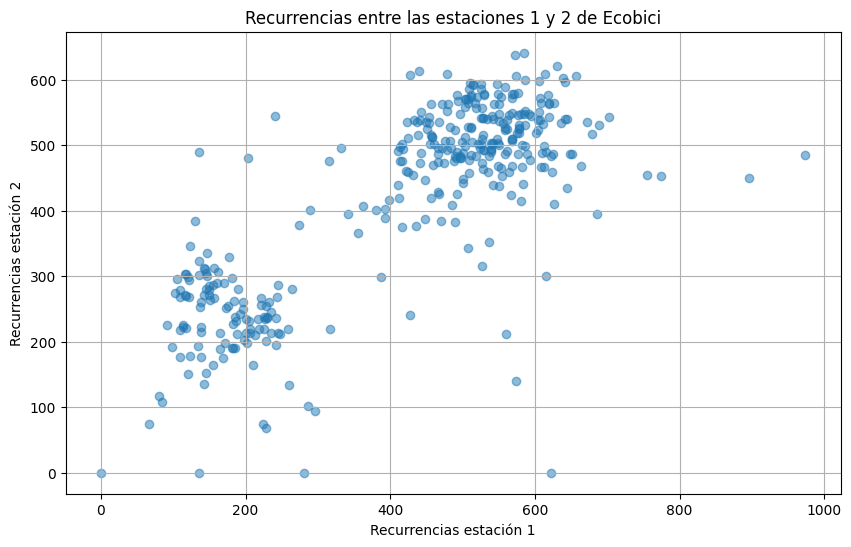

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(recurrences_est1_eco, recurrences_est2_eco, alpha=0.5)
plt.title('Recurrencias entre las estaciones 1 y 2 de Ecobici')
plt.xlabel('Recurrencias estación 1')
plt.ylabel('Recurrencias estación 2')
plt.grid()
plt.show()

In [29]:
scaler1_eco = StandardScaler()
scaler2_eco = StandardScaler()

recurrences_est1_eco_scaled = scaler1_eco.fit_transform(np.array(recurrences_est1_eco).reshape(-1, 1))
recurrences_est2_eco_scaled = scaler2_eco.fit_transform(np.array(recurrences_est2_eco).reshape(-1, 1))

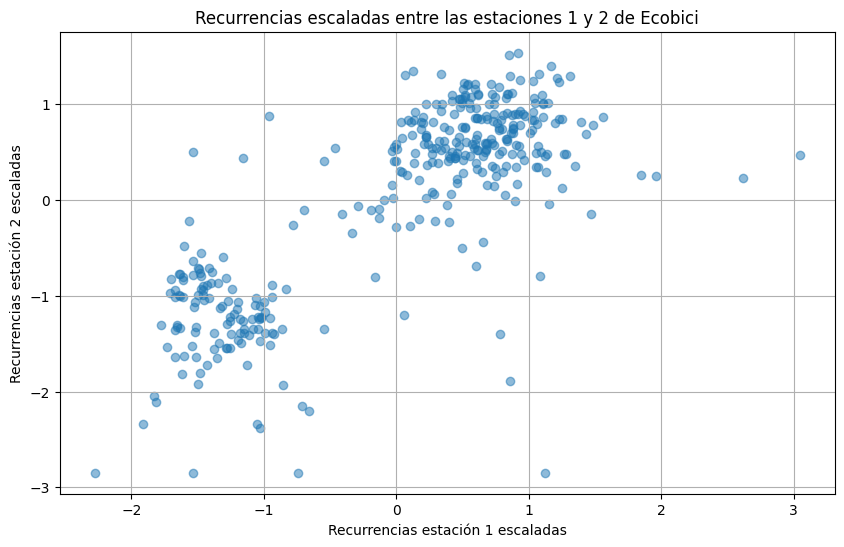

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(recurrences_est1_eco_scaled, recurrences_est2_eco_scaled, alpha=0.5)
plt.title('Recurrencias escaladas entre las estaciones 1 y 2 de Ecobici')
plt.xlabel('Recurrencias estación 1 escaladas') 
plt.ylabel('Recurrencias estación 2 escaladas')
plt.grid()
plt.show()

In [75]:
label_day_eco = []

for date in dates:
    current_day = datetime.datetime.strptime(date, '%Y-%m-%d').strftime('%A').lower()
    if current_day in weekend_days:
        label_day_eco.append(2)
    elif date in special_days:
        label_day_eco.append(1)
    else:
        label_day_eco.append(3)

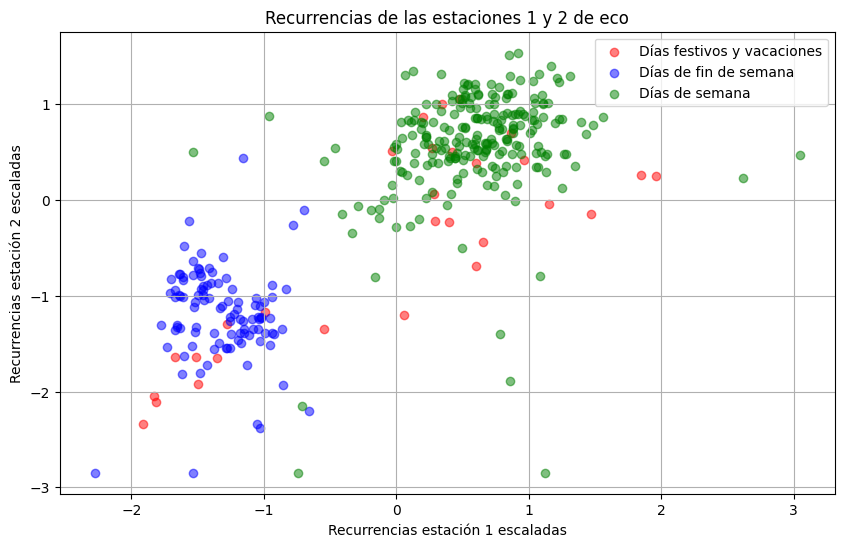

In [76]:
plt.figure(figsize=(10, 6))

recurrences_est1_eco_scaled = np.array(recurrences_est1_eco_scaled)
recurrences_est2_eco_scaled = np.array(recurrences_est2_eco_scaled)
label_day = np.array(label_day_eco)

for key in colors:
    mask = (label_day == key)  
    plt.scatter(
        recurrences_est1_eco_scaled[mask], 
        recurrences_est2_eco_scaled[mask], 
        color=colors[key], 
        alpha=0.5, 
        label=labels[key]
    )

plt.title('Recurrencias de las estaciones 1 y 2 de eco')
plt.xlabel('Recurrencias estación 1 escaladas')
plt.ylabel('Recurrencias estación 2 escaladas')
plt.legend()
plt.grid()
plt.show()

In [119]:
n_stations = 15
recurrences_eco_s3 = []
indexes_to_consider = np.argsort(recurrences_eco)[len(recurrences_eco) - n_stations:]
est_eco_s3_filtered = est_eco_s3[indexes_to_consider]
for est in est_eco_s3_filtered:
    recurrences_est = []
    current_data = data_eco_semana3[(data_eco_semana3['Ciclo_Estacion_Retiro'] == est) | (data_eco_semana3['Ciclo_Estacion_Arribo'] == est)]
    for date in dates_s3:
        current_date = current_data[current_data['Fecha_Retiro'] == date]
        if len(current_date) > 0:
            recurrences_est.append(len(current_date))
        else:
            recurrences_est.append(0)
    recurrences_eco_s3.append(recurrences_est)

correlation_matrix_eco_s3 = np.corrcoef(recurrences_eco_s3)

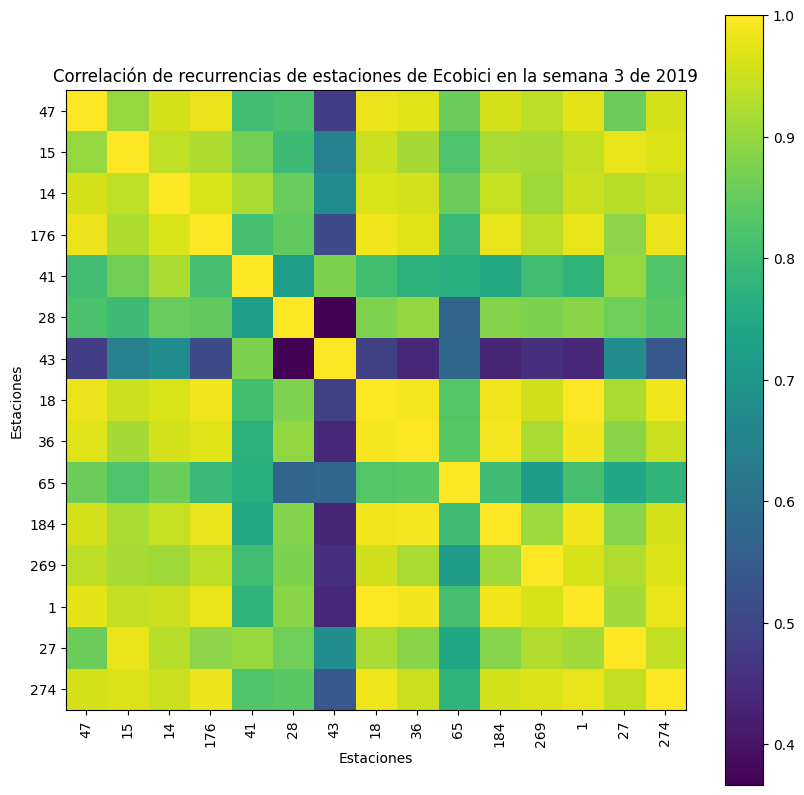

In [120]:
st = 1
plt.figure(figsize=(10,10))
plt.imshow(correlation_matrix_eco_s3, interpolation='nearest')
plt.xlabel('Estaciones')
plt.ylabel('Estaciones')
plt.title('Correlación de recurrencias de estaciones de Ecobici en la semana 3 de 2019')
plt.xticks(np.arange(len(est_eco_s3_filtered), step=st), est_eco_s3_filtered[::st], rotation=90)
plt.yticks(np.arange(len(est_eco_s3_filtered), step=st), est_eco_s3_filtered[::st])
plt.colorbar()
plt.show()

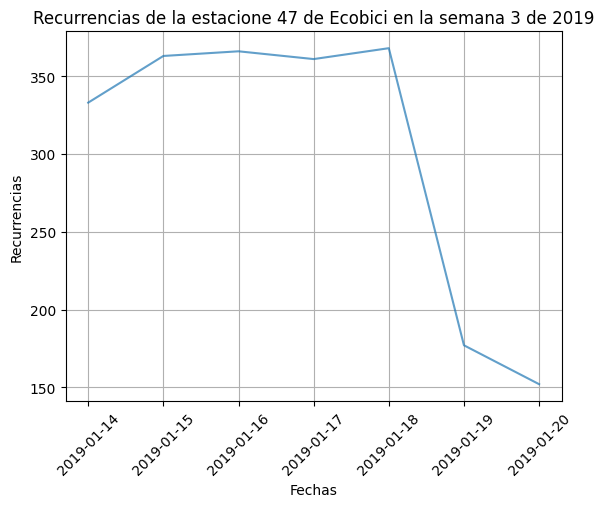

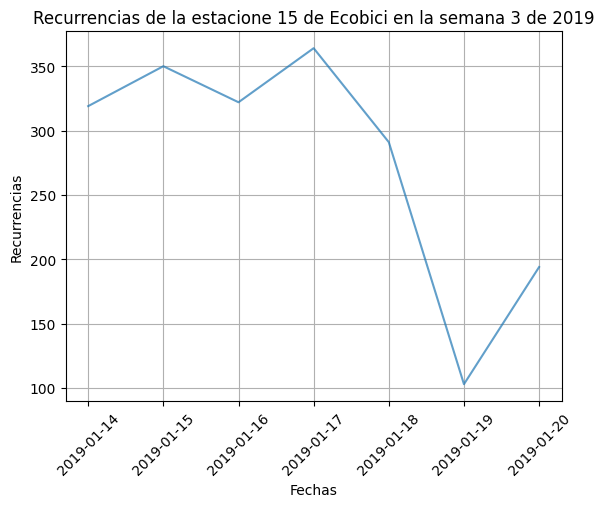

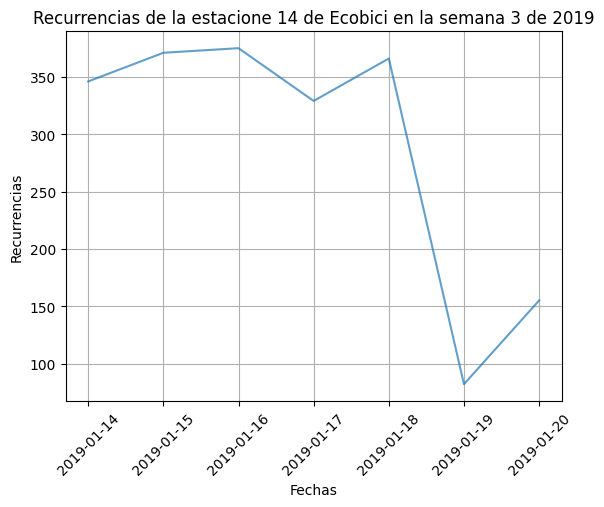

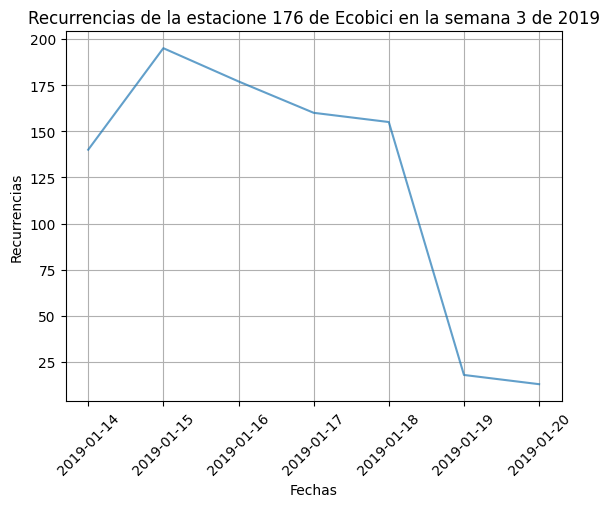

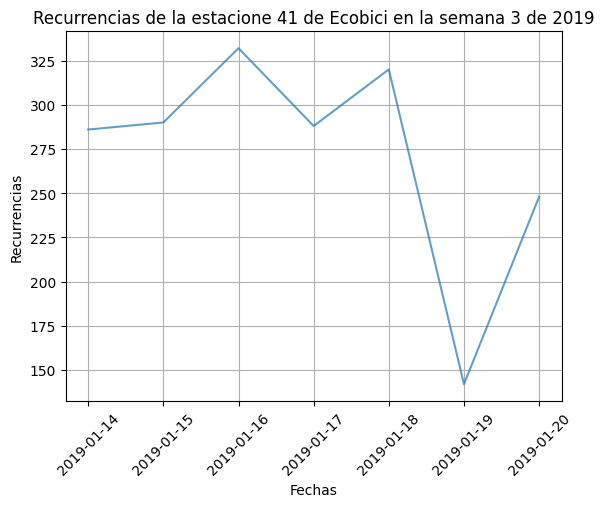

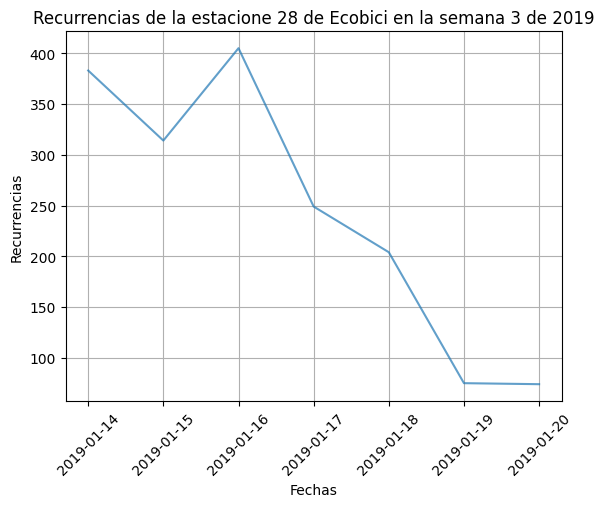

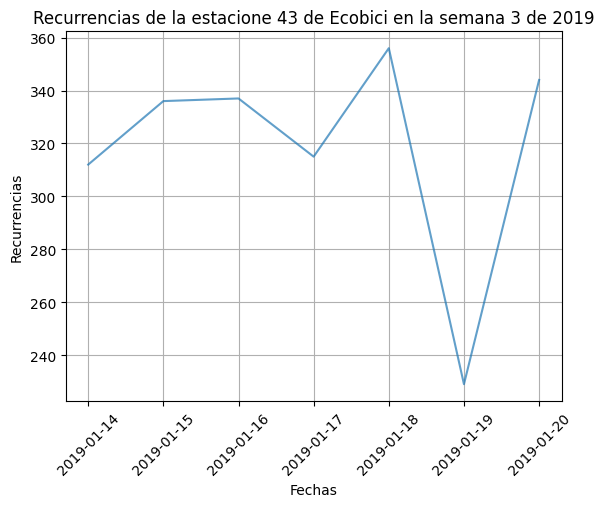

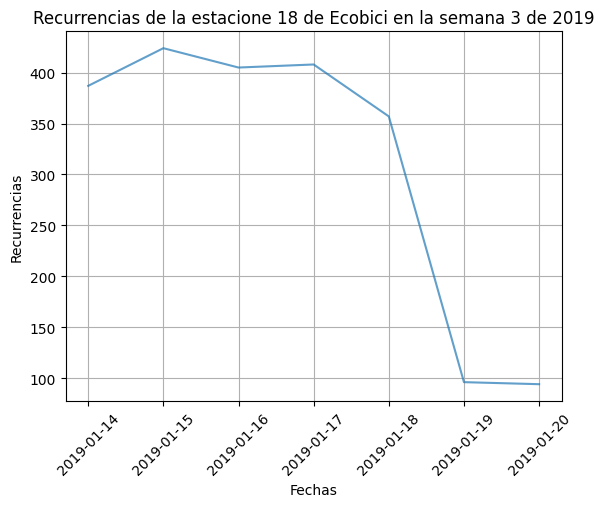

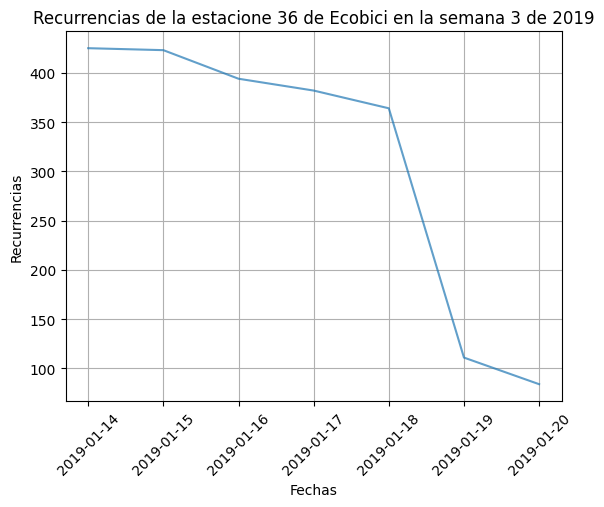

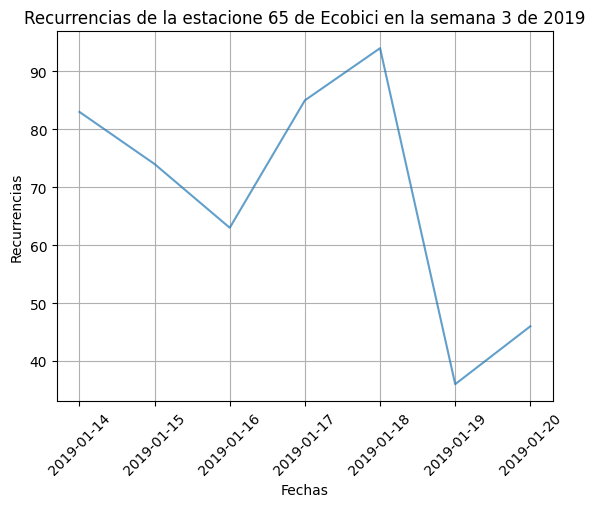

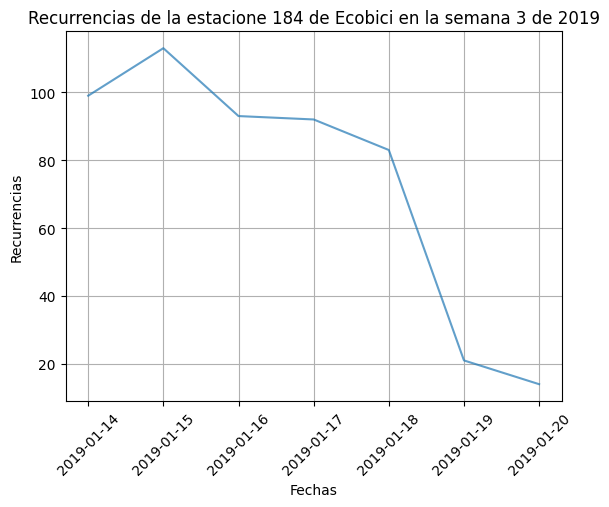

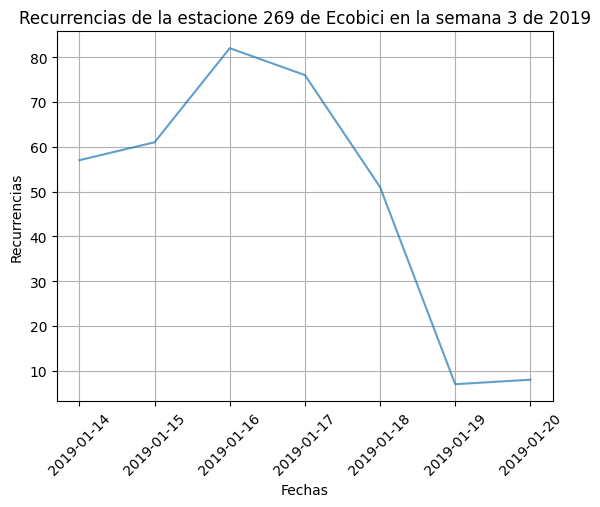

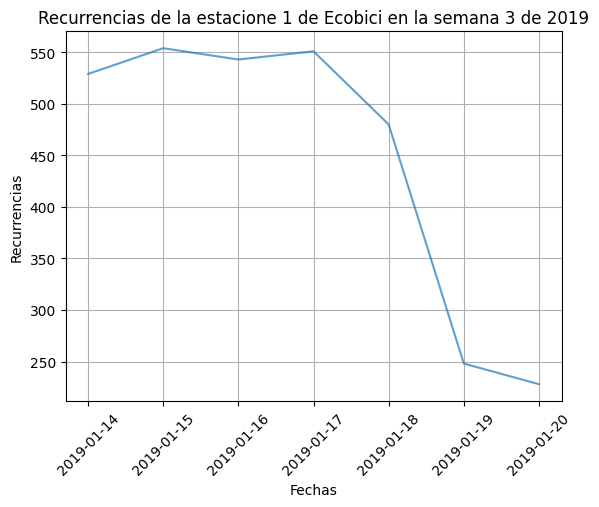

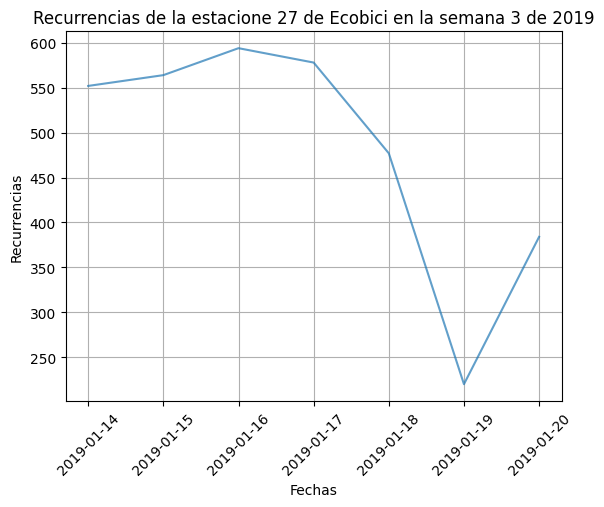

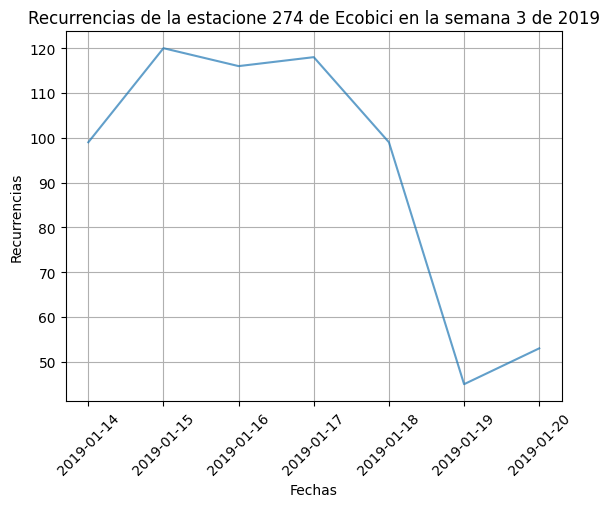

In [124]:
for recurrence in recurrences_eco_s3:
    current_index = recurrences_eco_s3.index(recurrence)
    plt.plot(dates_s3, recurrence, alpha=0.7)
    plt.title(f'Recurrencias de la estacione {est_eco_s3_filtered[current_index]} de Ecobici en la semana 3 de 2019')
    plt.xlabel('Fechas')
    plt.ylabel('Recurrencias')
    plt.xticks(dates_s3[::1], rotation=45)
    plt.grid()
    plt.show()

# Para Mibici

In [10]:
#estaciones_mibici = np.load(dir + 'Adj_mibici/matrices_estaciones/est_2019.npy')
estaciones_mibici = np.load('/Users/antoniomendez/Desktop/Tesis/Datos/Adj_mibici/matrices_estaciones/est_2019.npy')

In [11]:
data_mibici = pd.read_csv(dir + 'mibici/mibici_2019.csv')
data_mibici.head()

,Viaje_Id,Usuario_Id,Genero,Año_de_nacimiento,Inicio_del_viaje,Fin_del_viaje,Origen_Id,Destino_Id,Tiempo_viaje
0,8901295,341162,M,1992.0,2019-01-01 00:00:00,2019-01-01 00:16:09,50,54,16.150000
1,8901296,413443,M,1985.0,2019-01-01 06:01:05,2019-01-01 06:16:27,38,194,15.366667
2,8901297,444232,M,1995.0,2019-01-01 06:01:19,2019-01-01 06:09:55,86,18,8.600000
3,8901298,437533,M,1998.0,2019-01-01 06:01:25,2019-01-01 06:02:04,86,86,0.650000
4,8901299,430224,M,1992.0,2019-01-01 06:01:57,2019-01-01 06:05:01,27,52,3.066667


In [12]:
data_mibici = data_mibici[data_mibici['Origen_Id'] != 124]
data_mibici = data_mibici[data_mibici['Destino_Id'] != 124]

In [13]:
counter_mibici = flows.count_trips_mibici(data_mibici, threshold=1, directed=True)
counter_mibici.head()

,Est_A,Est_B,counts,prob
0,194,51,8682,0.001875
1,65,51,6719,0.001451
2,66,51,5197,0.001122
3,51,51,5139,0.001110
4,50,50,4963,0.001072


In [14]:
est_mibici = np.concatenate((counter_mibici['Est_A'].unique(), counter_mibici['Est_B'].unique()))
est_mibici = np.unique(est_mibici)
est_mibici = np.sort(est_mibici)

In [15]:
len(est_mibici)

274

In [90]:
recurrences_mibici = []
for s in est_mibici:
    current_data = counter_mibici[(counter_mibici['Est_A'] == s) | (counter_mibici['Est_B'] == s)]
    recurrences_mibici.append(np.sum(current_data['counts']))

recurrences_mibici = np.array(recurrences_mibici)

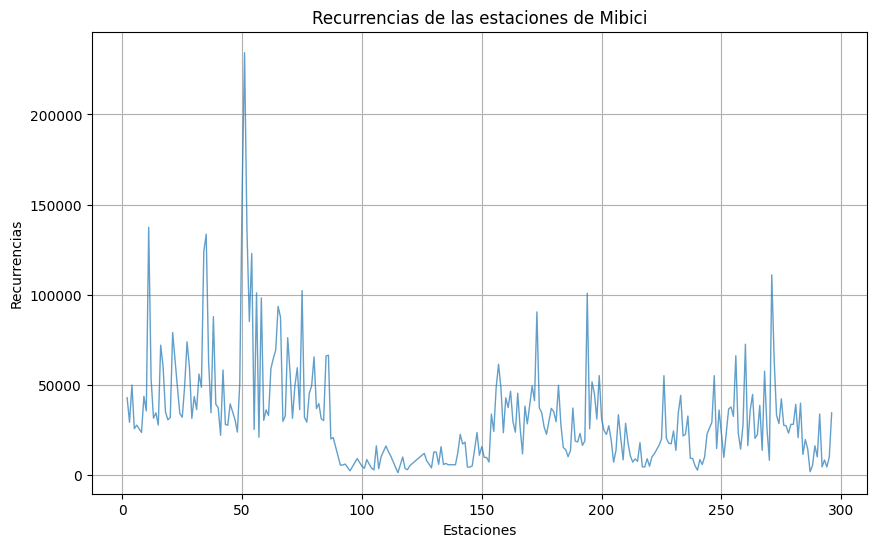

In [91]:
plt.figure(figsize=(10, 6))
plt.plot(est_mibici, recurrences_mibici, linewidth=1, alpha=0.7)
plt.title('Recurrencias de las estaciones de Mibici')
plt.xlabel('Estaciones')
plt.ylabel('Recurrencias')
plt.grid()
plt.show()

In [92]:
est1_index_mibici = np.argmax(recurrences_mibici)
est2_index_mibici = np.argsort(recurrences_mibici)[-2]
est1_mibici = est_mibici[est1_index_mibici]
est2_mibici = est_mibici[est2_index_mibici]
print('Estación con más recurrencias:', est1_mibici)
print('Segunda estación con más recurrencias:', est2_mibici)

Estación con más recurrencias: 51
Segunda estación con más recurrencias: 50


In [16]:
dates = data_mibici['Inicio_del_viaje'].unique()
dates = [date[:10] for date in dates]
dates = np.unique(dates)
dates = np.sort(dates)
#dates = dates[1:]
dates[:10]

array(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
       '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
       '2019-01-09', '2019-01-10'], dtype='<U10')

In [ ]:
# puede tardar hasta 10 minutos idk
recurrences_est1_mibici = []
recurrences_est2_mibici = []

for date in dates:
    current_data = data_mibici[data_mibici['Inicio_del_viaje'].str.contains(date)]
    current_data1 = current_data[(current_data['Origen_Id'] == est1_mibici) | (current_data['Destino_Id'] == est1_mibici)]
    if current_data1.empty:
        recurrences_est1_mibici.append(0)
    else:
        recurrences_est1_mibici.append(np.sum(flows.count_trips_mibici(current_data1, threshold=1, directed=True)['counts']))
    current_data2 = current_data[(current_data['Origen_Id'] == est2_mibici) | (current_data['Destino_Id'] == est2_mibici)]
    if current_data2.empty:
        recurrences_est2_mibici.append(0)
    else:
        recurrences_est2_mibici.append(np.sum(flows.count_trips_mibici(current_data2, threshold=1, directed=True)['counts']))

In [33]:
recurrences_est1_mibici = np.load('vector_files/recurrences_est1_mibici.npy')
recurrences_est2_mibici = np.load('vector_files/recurrences_est2_mibici.npy')

In [94]:
grid_mibici = grid.Grid(5,5,'mibici')
map_mibici = grid_mibici.map_around()

for i in range(len(est_mibici)):
    current_est = estaciones_mibici[i, 0]
    current_index = np.where(est_mibici == current_est)[0][0]
    current_recurrence = recurrences_mibici[current_index]
    if estaciones_mibici[i, 0] == est1_mibici:
        folium.Marker([estaciones_mibici[i, 1], estaciones_mibici[i, 2]], popup=f'Estación {int(est1_mibici)} - Recurrencia {current_recurrence}').add_to(map_mibici)
    elif estaciones_mibici[i, 0] == est2_mibici:
        folium.Marker([estaciones_mibici[i, 1], estaciones_mibici[i, 2]], popup=f'Estación {int(est2_mibici)} - Recurrencia {current_recurrence}').add_to(map_mibici)
    else:
        folium.CircleMarker([estaciones_mibici[i, 1], estaciones_mibici[i, 2]], radius=0.5, popup=f'Estacion {int(estaciones_mibici[i][0])} - Recurrencia {current_recurrence}').add_to(map_mibici)
map_mibici

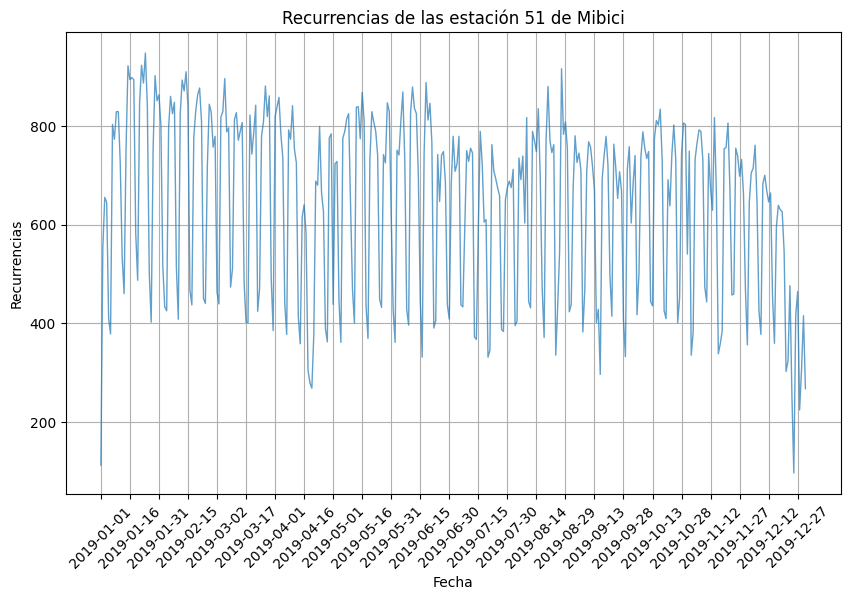

In [98]:
plt.figure(figsize=(10, 6))
plt.plot(dates, recurrences_est1_mibici, linewidth=1, alpha=0.7, label='Estación 1')
plt.title(f'Recurrencias de las estación {int(est1_mibici)} de Mibici')
plt.xlabel('Fecha')
plt.ylabel('Recurrencias')
plt.xticks(dates[::15], rotation=45)
plt.grid()
plt.show()

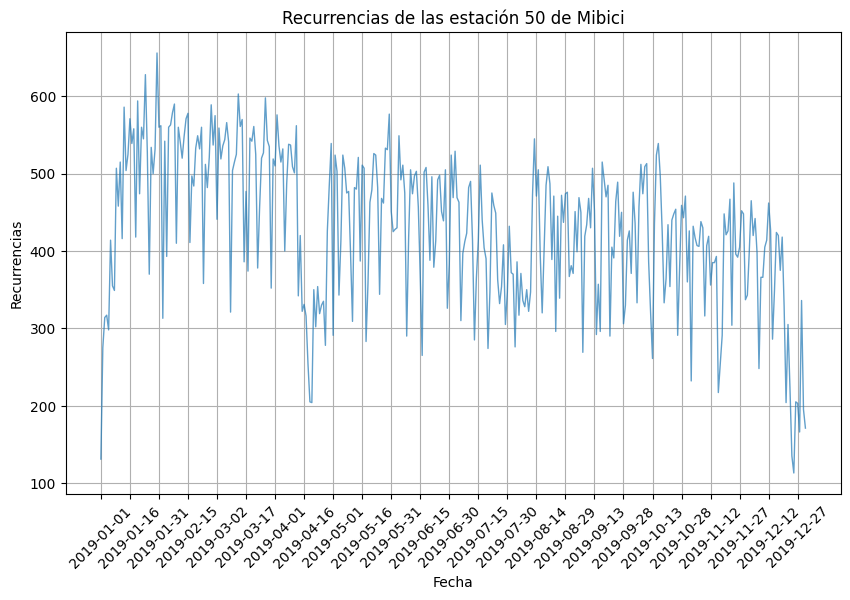

In [99]:
plt.figure(figsize=(10, 6))
plt.plot(dates, recurrences_est2_mibici, linewidth=1, alpha=0.7, label='Estación 2')
plt.title(f'Recurrencias de las estación {int(est2_mibici)} de Mibici')
plt.xlabel('Fecha')
plt.ylabel('Recurrencias')
plt.xticks(dates[::15], rotation=45)
plt.grid()
plt.show()

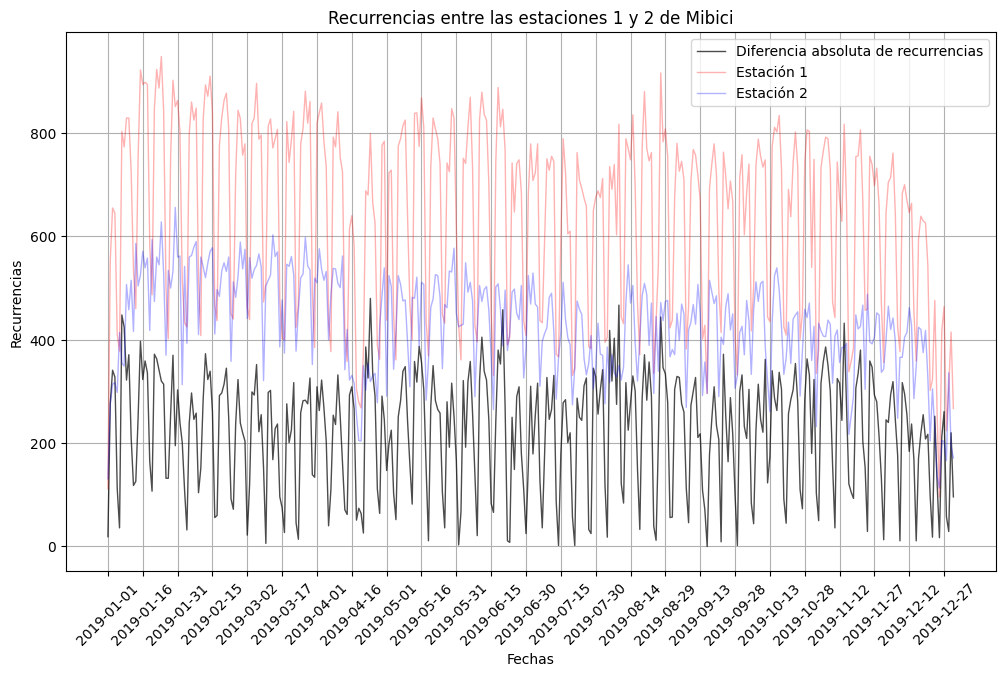

In [100]:
n = len(dates)
plt.figure(figsize=(12, 7))
plt.plot(dates[:n], np.abs(recurrences_est1_mibici[:n] - recurrences_est2_mibici[:n]), linewidth=1, alpha=0.7, c='black', label='Diferencia absoluta de recurrencias')
plt.plot(dates[:n], recurrences_est1_mibici[:n], linewidth=1, alpha=0.3, c='red', label='Estación 1')
plt.plot(dates[:n], recurrences_est2_mibici[:n], linewidth=1, alpha=0.3, c='blue', label='Estación 2')
plt.title('Recurrencias entre las estaciones 1 y 2 de Mibici')
plt.xlabel('Fechas')
plt.ylabel('Recurrencias')
plt.xticks(dates[:n:15], rotation=45)
plt.legend()
plt.grid()
plt.show()

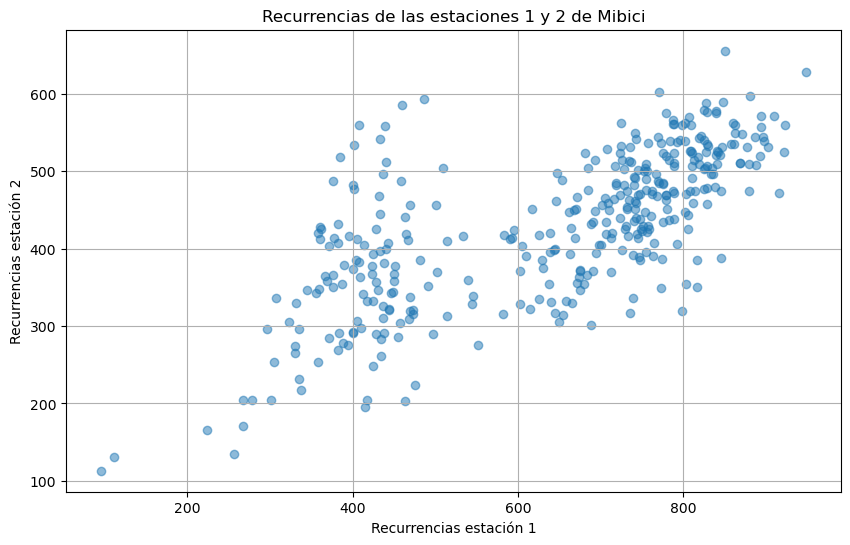

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(recurrences_est1_mibici, recurrences_est2_mibici, alpha=0.5)
plt.title('Recurrencias de las estaciones 1 y 2 de Mibici')
plt.xlabel('Recurrencias estación 1')
plt.ylabel('Recurrencias estación 2')
plt.grid()
plt.show()

In [34]:
scaler1_mibici = StandardScaler()
scaler2_mibici = StandardScaler()

recurrences_est1_mibici_scaled = scaler1_mibici.fit_transform(recurrences_est1_mibici.reshape(-1, 1))
recurrences_est2_mibici_scaled = scaler2_mibici.fit_transform(recurrences_est2_mibici.reshape(-1, 1))

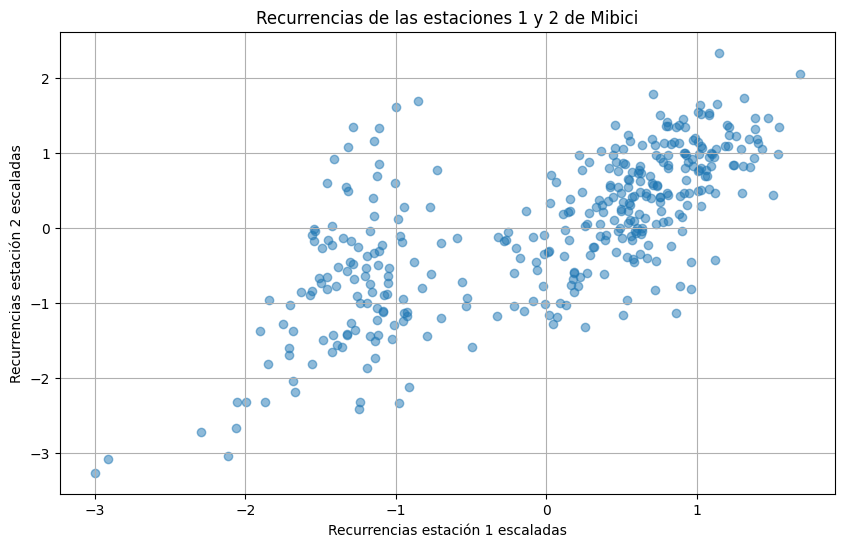

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(recurrences_est1_mibici_scaled, recurrences_est2_mibici_scaled, alpha=0.5)
plt.title('Recurrencias de las estaciones 1 y 2 de Mibici')
plt.xlabel('Recurrencias estación 1 escaladas')
plt.ylabel('Recurrencias estación 2 escaladas')
plt.grid()
plt.show()

In [73]:
label_day_mibici = []

for date in dates:
    if date in special_days:
        label_day_mibici.append(1)
    elif datetime.datetime.strptime(date, '%Y-%m-%d').strftime('%A').lower() in weekend_days:
        label_day_mibici.append(2)
    else:
        label_day_mibici.append(3)

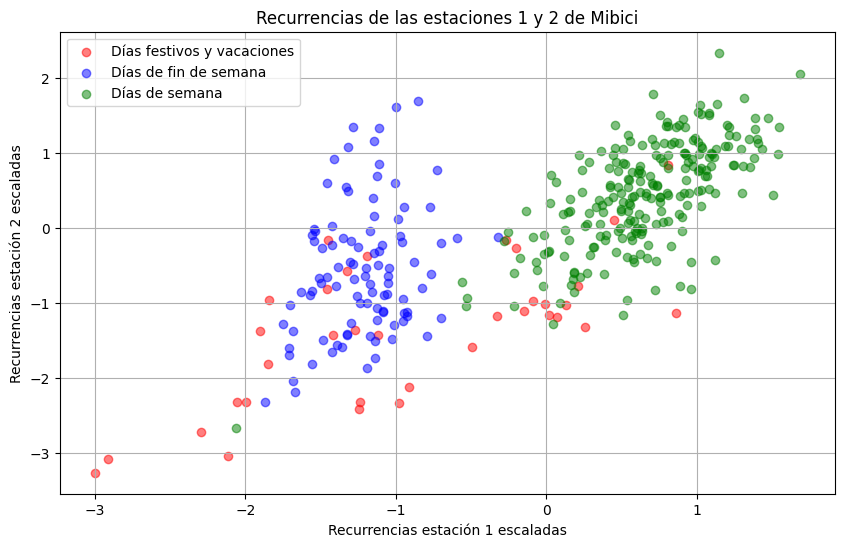

In [74]:
plt.figure(figsize=(10, 6))

recurrences_est1_mibici_scaled = np.array(recurrences_est1_mibici_scaled)
recurrences_est2_mibici_scaled = np.array(recurrences_est2_mibici_scaled)
label_day = np.array(label_day_mibici)

for key in colors:
    mask = (label_day == key)  
    plt.scatter(
        recurrences_est1_mibici_scaled[mask], 
        recurrences_est2_mibici_scaled[mask], 
        color=colors[key], 
        alpha=0.5, 
        label=labels[key]
    )

plt.title('Recurrencias de las estaciones 1 y 2 de Mibici')
plt.xlabel('Recurrencias estación 1 escaladas')
plt.ylabel('Recurrencias estación 2 escaladas')
plt.legend()
plt.grid()
plt.show()